In [1]:
import sys
print(sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


In [2]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
sys.path.append("../code/")

In [4]:
from pca import GenePCA, plot_pca_results

https://github.com/JanetMatsen/elvizAnalysis/blob/dc568af7ed589410bf9612ba5ec7ccf257e87d1e/elviz_pca.py

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [5]:
sample_info = pd.read_csv('../data/sample_info.tsv', sep='\t')

In [6]:
sample_info.head()

,ID,oxy,rep,week,project
0,1_LOW4,Low,1,4,1056013
1,13_LOW5,Low,1,5,1056037
2,25_LOW6,Low,1,6,1056061
3,37_LOW7,Low,1,7,1056085
4,49_LOW8,Low,1,8,1056109


In [7]:
all_X = pd.read_csv('../data/raw_data/3_summary_rpkm_byGeneProuct.xls', sep = '\t')
all_X.head(2)

,product,1_LOW4,2_LOW4,3_LOW4,4_LOW4,10_HOW4,7_HOW4,8_HOW4,9_HOW4,13_LOW5,...,118_HOW13,121_LOW14,122_LOW14,123_LOW14,124_LOW14,127_HOW14,128_HOW14,129_HOW14,130_HOW14,total_exp
0,methane/ammonia monooxygenase subunit C,354033,235805,354945,226251,166528,170345,215993,92617,230044,...,244577,225369,244171,421624,253215,172145,139830,85559,274075,17548421
1,hypothetical protein,114331,156292,106832,161303,210150,159545,280128,183995,166600,...,133374,116598,156828,117131,166325,201734,188633,166096,179071,15309772


In [8]:
all_X.shape

(13891, 85)

In [9]:
X = all_X.drop(['product'], axis=1).T
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13881,13882,13883,13884,13885,13886,13887,13888,13889,13890
1_LOW4,354033,114331,150781,148758,2765,2330,153,160,3040,1523,...,0,0,0,0,0,0,0,0,0,0
2_LOW4,235805,156292,122485,100699,48,2679,64,10499,3483,1447,...,0,0,0,0,0,0,0,0,0,0
3_LOW4,354945,106832,165987,152442,198,1953,284,173,2556,2076,...,0,0,0,0,0,0,0,0,0,0
4_LOW4,226251,161303,95802,89220,389,1791,69,17535,5225,1587,...,0,0,0,0,0,0,0,0,0,0
10_HOW4,166528,210150,98993,63402,80,6316,1073,36995,12159,135,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.reset_index(inplace=True)

In [11]:
X = X.rename(columns={'index':'sample'})

In [12]:
X.head()

,sample,0,1,2,3,4,5,6,7,8,...,13881,13882,13883,13884,13885,13886,13887,13888,13889,13890
0,1_LOW4,354033,114331,150781,148758,2765,2330,153,160,3040,...,0,0,0,0,0,0,0,0,0,0
1,2_LOW4,235805,156292,122485,100699,48,2679,64,10499,3483,...,0,0,0,0,0,0,0,0,0,0
2,3_LOW4,354945,106832,165987,152442,198,1953,284,173,2556,...,0,0,0,0,0,0,0,0,0,0
3,4_LOW4,226251,161303,95802,89220,389,1791,69,17535,5225,...,0,0,0,0,0,0,0,0,0,0
4,10_HOW4,166528,210150,98993,63402,80,6316,1073,36995,12159,...,0,0,0,0,0,0,0,0,0,0


In [13]:
SAMPLE_NAMES = X['sample']

In [14]:
X_counts = X.drop('sample', axis=1)

In [15]:
X_counts.head(2)

,0,1,2,3,4,5,6,7,8,9,...,13881,13882,13883,13884,13885,13886,13887,13888,13889,13890
0,354033,114331,150781,148758,2765,2330,153,160,3040,1523,...,0,0,0,0,0,0,0,0,0,0
1,235805,156292,122485,100699,48,2679,64,10499,3483,1447,...,0,0,0,0,0,0,0,0,0,0


In [16]:
model = GenePCA(raw_x = X_counts, sample_names=SAMPLE_NAMES, sample_info=sample_info)

In [17]:
type(SAMPLE_NAMES)

pandas.core.series.Series

In [18]:
model.fit()

     direction 1    direction 2   sample       ID   oxy  rep  week  project
0 -265169.926244  -94042.960859   1_LOW4   1_LOW4   Low    1     4  1056013
1 -343408.079711  -29636.833256   2_LOW4   2_LOW4   Low    2     4  1056016
2 -261193.389360 -105082.749215   3_LOW4   3_LOW4   Low    3     4  1056019
3 -361551.070725  -14791.162293   4_LOW4   4_LOW4   Low    4     4  1056022
4 -377935.299785   28510.401802  10_HOW4  10_HOW4  High    4     4  1056034


('preparing colors for 7 pre-oxygen-switch', 'samples and 4 post-switch samples')
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11

{'ylim': (-509215.64, 470267.94), 'col': 'rep', 'xlim': (-509215.64, 470267.94), 'row': 'oxy'}


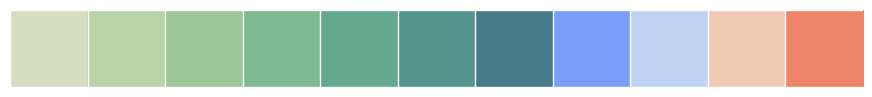

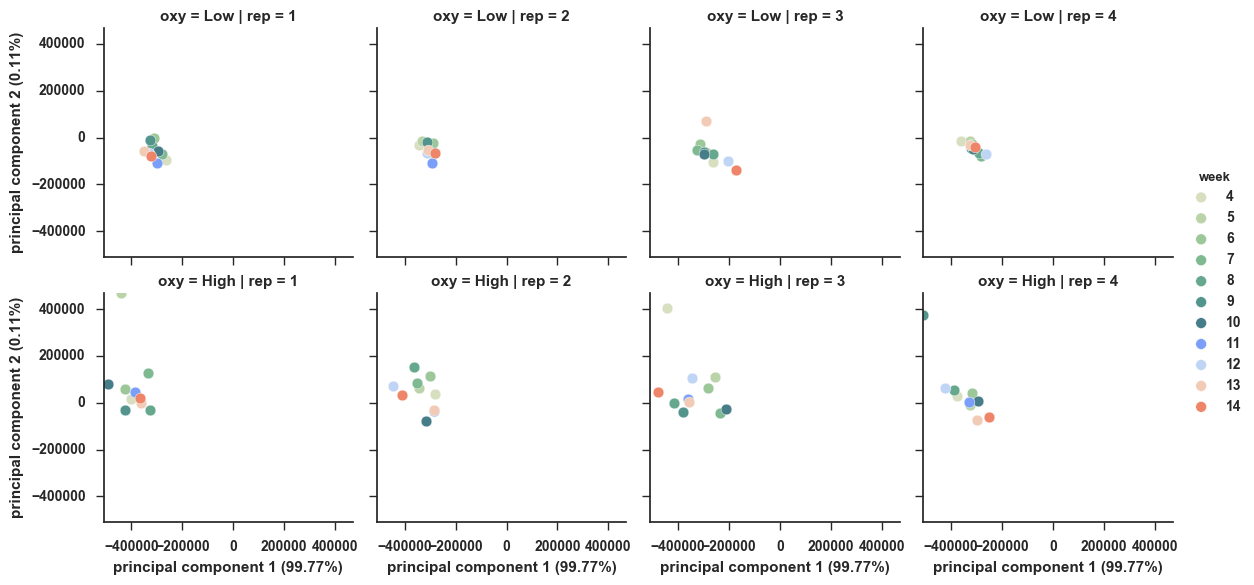

In [19]:
plot_pca_results(plot_data=model.plot_data, variances=model.explained_variance, 
                facet_row = True, uniform_axes=True)

('preparing colors for 7 pre-oxygen-switch', 'samples and 4 post-switch samples')
[[0.8423298817793848, 0.8737404427964184, 0.7524954030731037], [0.7294791289837665, 0.828271237142885, 0.6624387159929747], [0.6081786671884791, 0.7816177694090097, 0.6017787295654944], [0.4926406966923403, 0.7267784825949665, 0.5693088339489007], [0.39493837953687966, 0.6591653753197486, 0.5567106633592679], [0.3256286372570367, 0.5824294714811111, 0.551260440725878], [0.2775060539006816, 0.4896743690748741, 0.5382978119096076]]
11



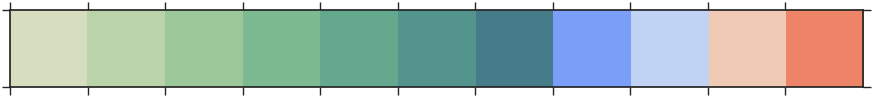

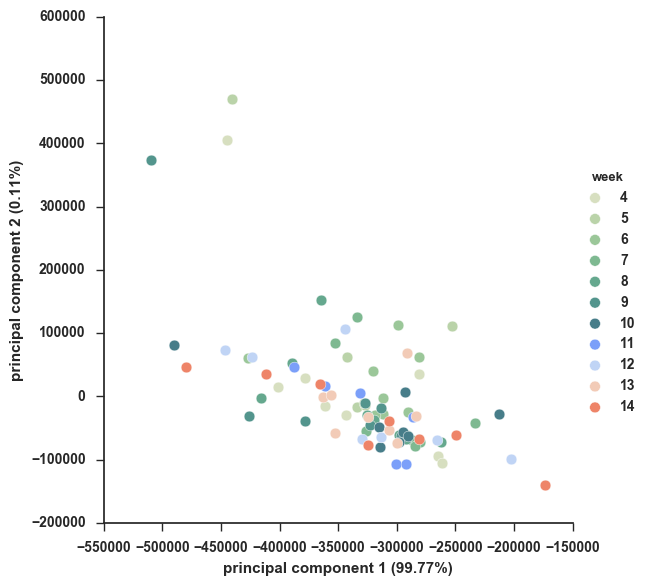

In [20]:
f = plot_pca_results(plot_data=model.plot_data, variances=model.explained_variance, 
                facet_row = False, uniform_axes=False, subplot_size=6)

In [21]:
f.savefig("../figures/161111_PCA.pdf")